In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch
import matplotlib.pyplot as plt
from PIL import Image

c:\Users\thdam\miniconda3\envs\wsi\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
mean = [0.5172, 0.4853, 0.4789]
std = [0.2236, 0.2257, 0.2162]

In [13]:
root_folder = r"D:\final_year_project\dataset_900\DiPASL-S900"
BATCH_SIZE = 32

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
])
    # Add any other transformations you need

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
root_folder = r"D:\final_year_project\dataset_900\dataset1"
BATCH_SIZE = 32

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.RandomApply([
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.0),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    ], p=0.6),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5172, 0.4853, 0.4789],
                        std = [0.2236, 0.2257, 0.2162])
])
    # Add any other transformations you need

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [14]:
data0 = next(iter(dataloader))

In [15]:
data0[1][1]

tensor(18)

In [16]:
aug = transforms.Compose([
    transforms.RandomApply([
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    ], p=0.6),
    transforms.ToTensor(),
    # transforms.Normalize(mean = [0.5172, 0.4853, 0.4789],
    #                     std = [0.2236, 0.2257, 0.2162])
])

In [10]:
i = 3
original_image = transforms.ToPILImage()(data0[0][i])
transformed_image = aug(original_image)

In [7]:
min_val = torch.min(transformed_image)
max_val = torch.max(transformed_image)
transformed_image_rescaled = (transformed_image - min_val) / (max_val - min_val)

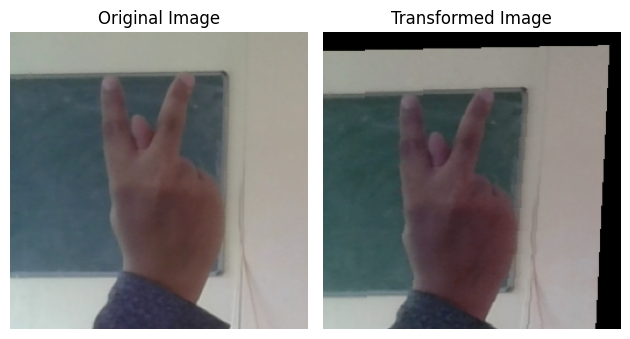

In [11]:
transformed_image_pil = transforms.ToPILImage()(transformed_image)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2)

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')

# Display the transformed image
axes[1].imshow(transformed_image_pil)
axes[1].set_title('Transformed Image')

# Remove the axis labels
for ax in axes:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

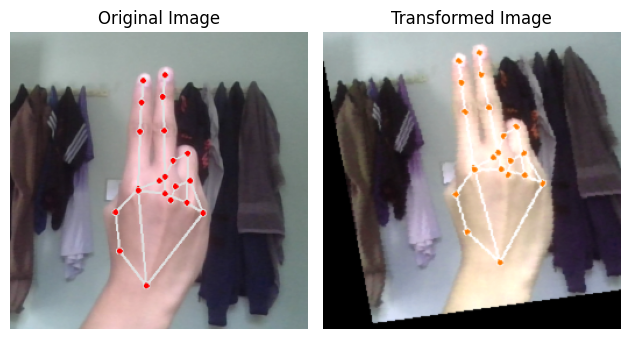

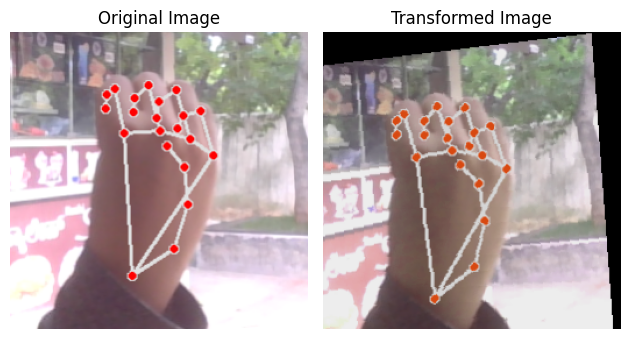

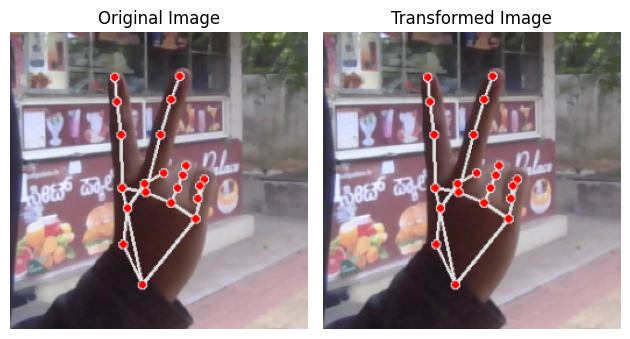

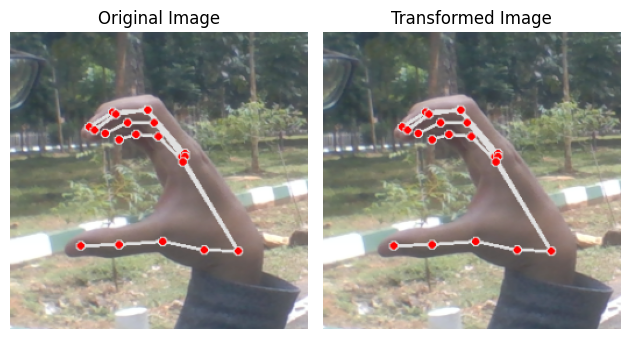

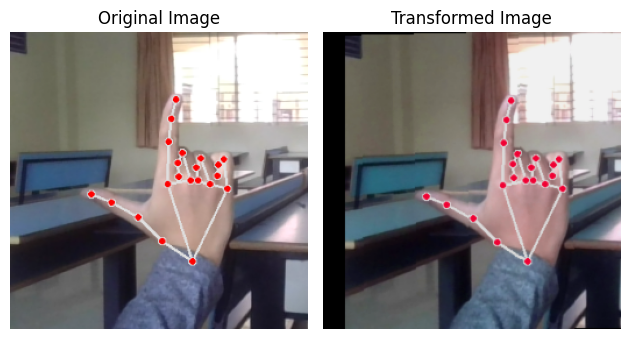

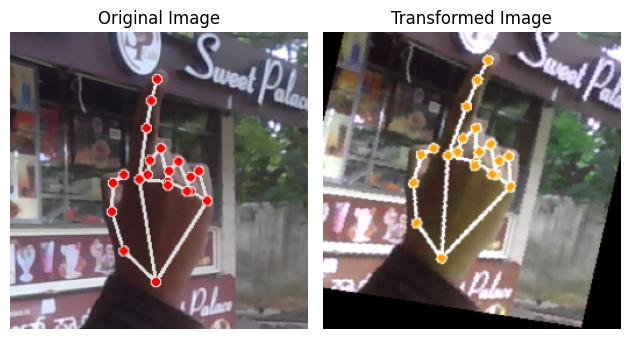

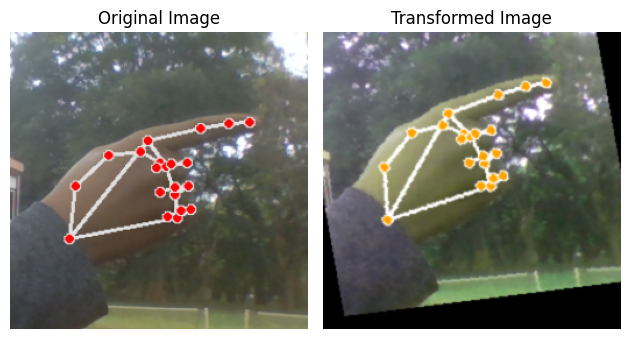

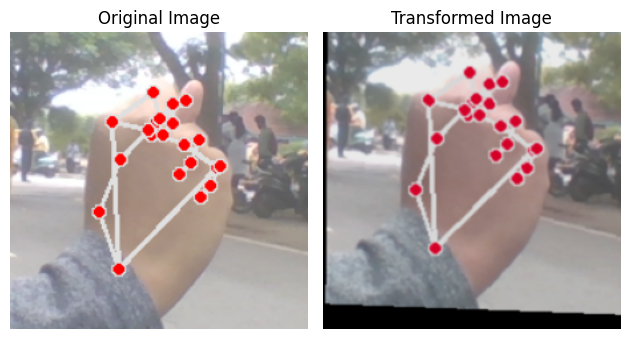

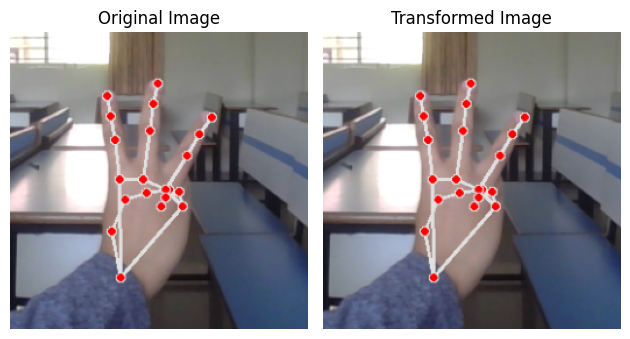

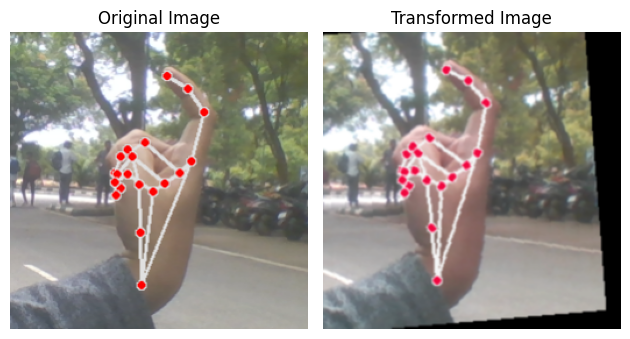

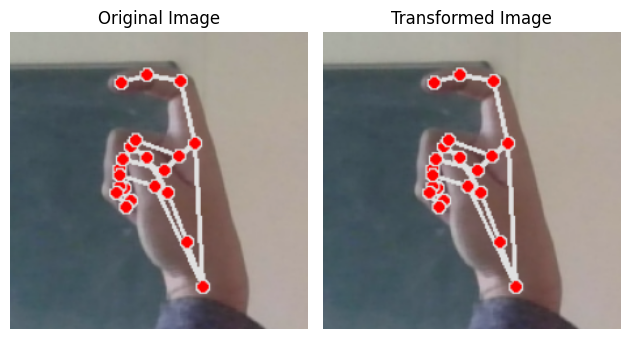

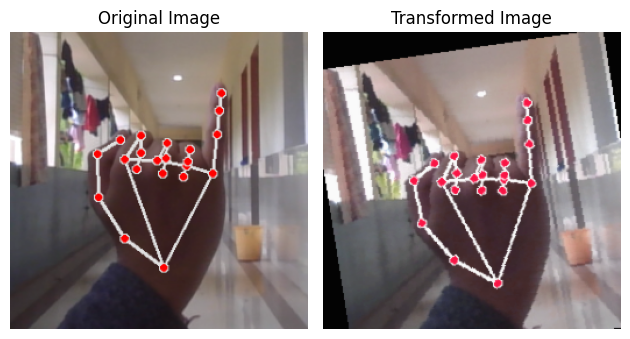

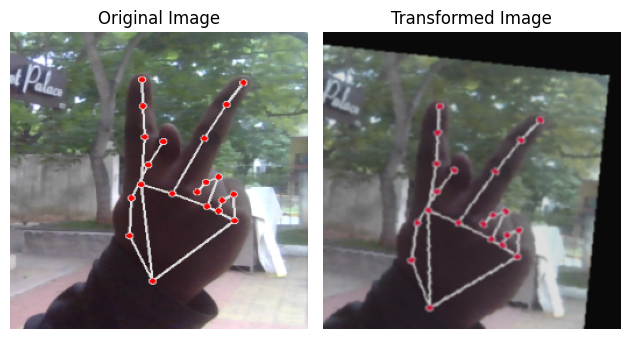

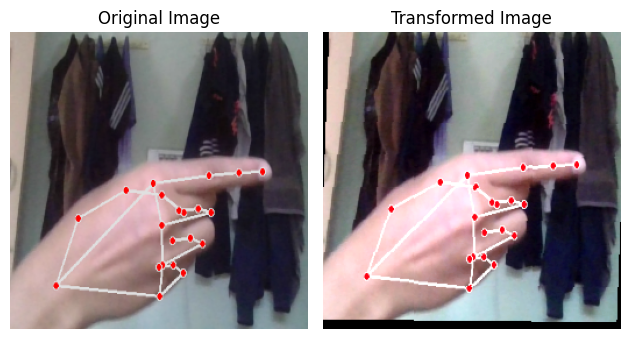

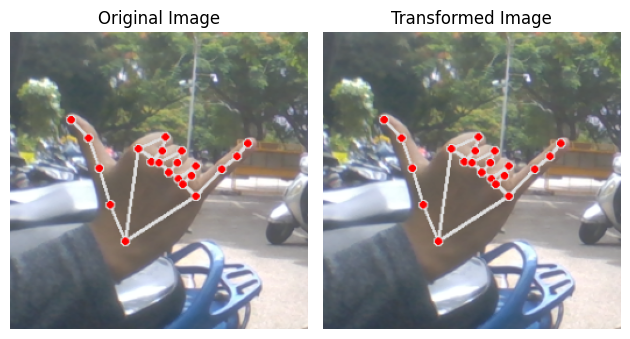

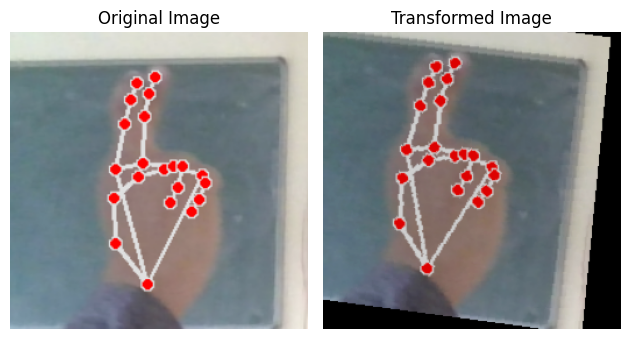

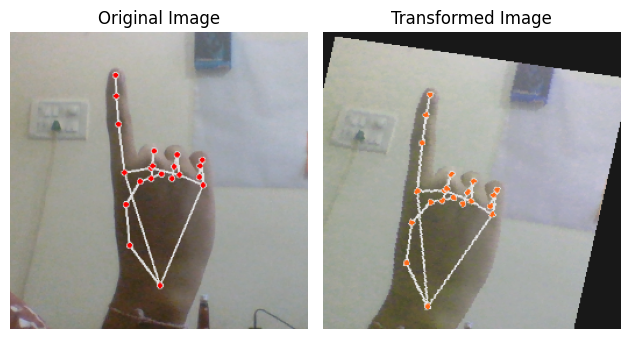

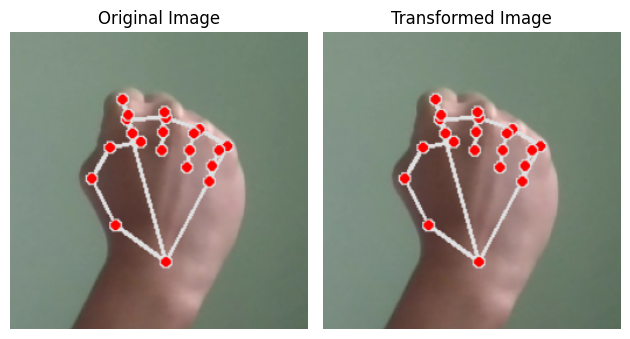

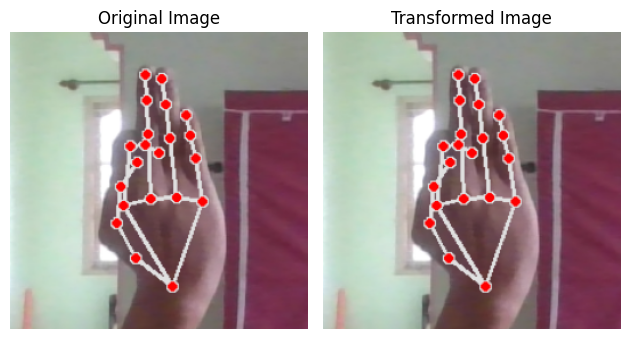

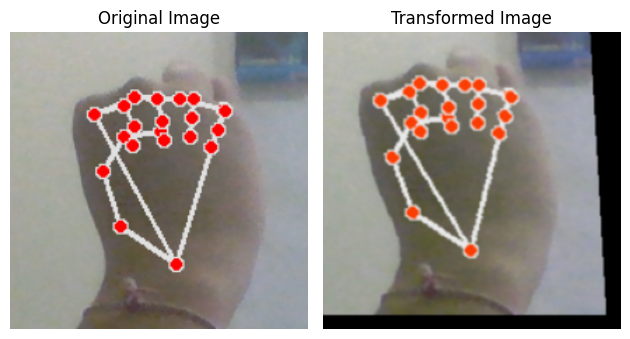

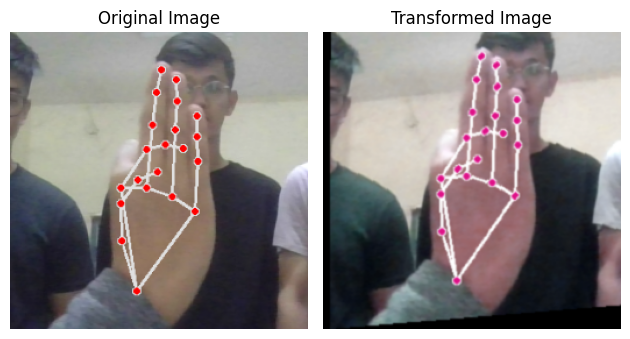

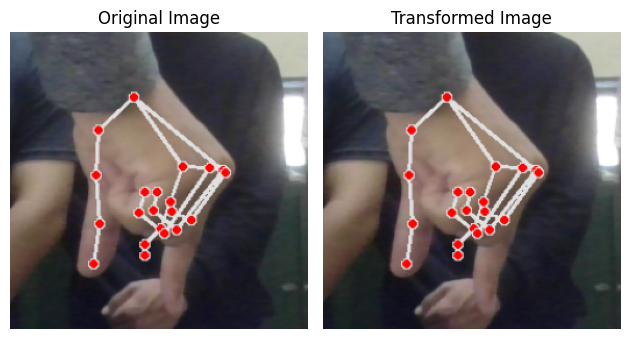

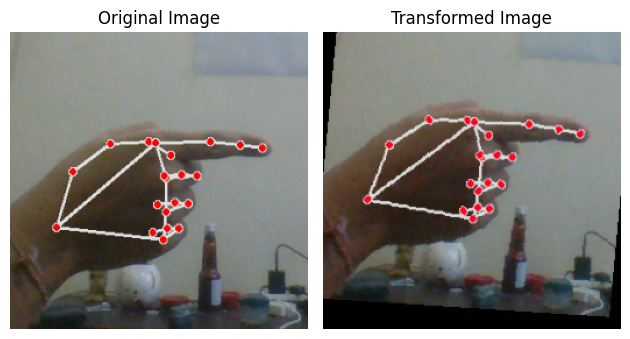

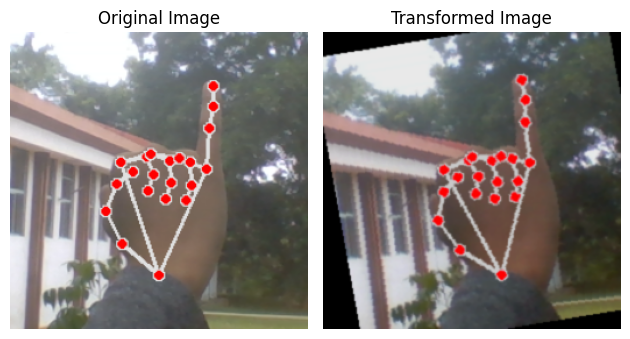

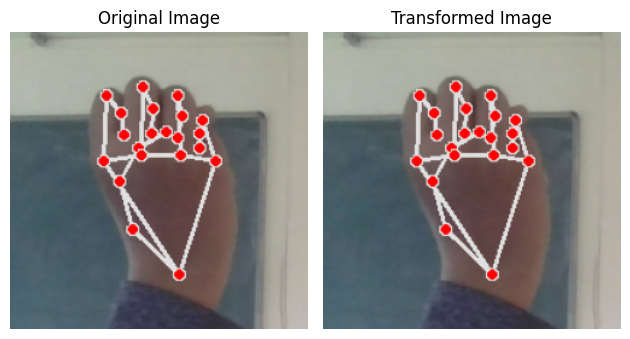

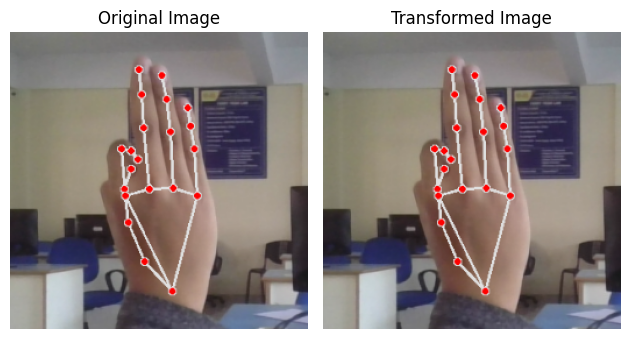

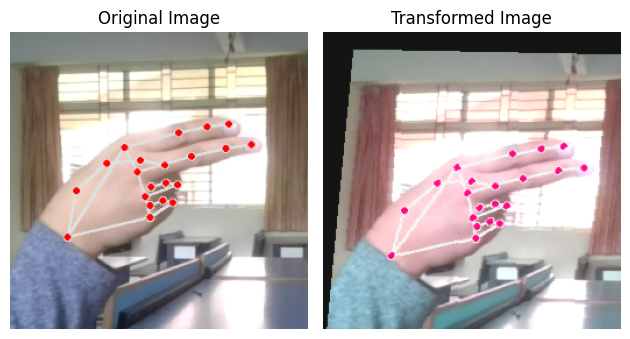

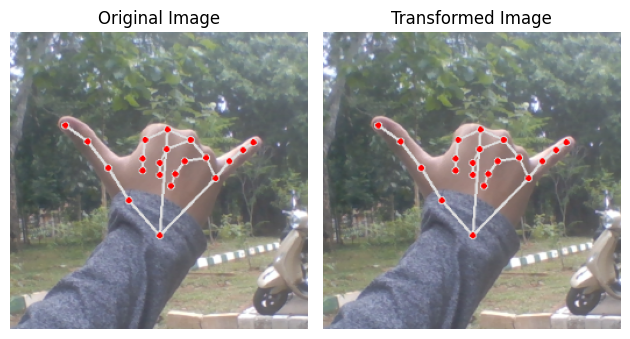

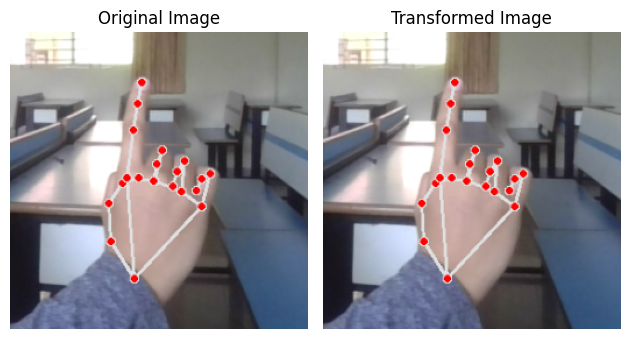

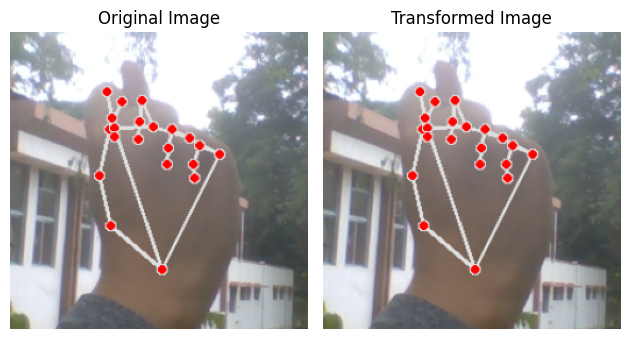

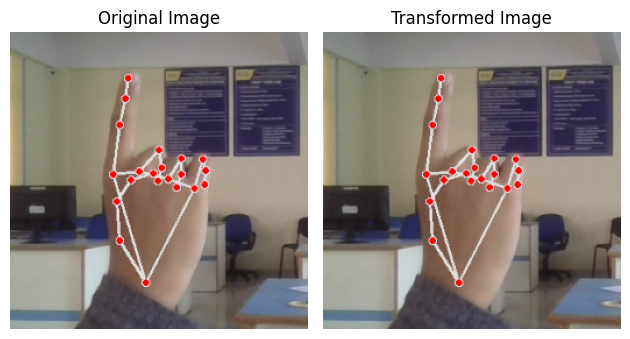

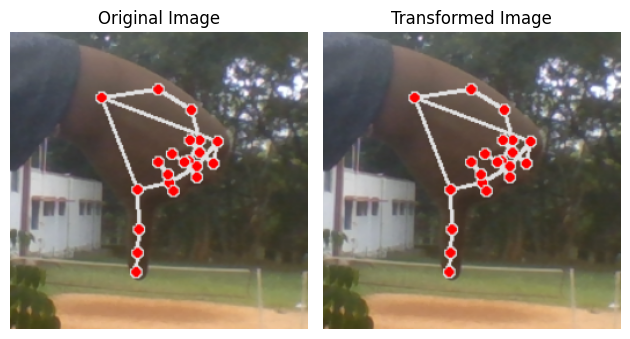

In [17]:
for i in range(32):
    original_image = transforms.ToPILImage()(data0[0][i])
    transformed_image = aug(original_image)
    
    transformed_image_pil = transforms.ToPILImage()(transformed_image)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2)

    # Display the original image
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')

    # Display the transformed image
    axes[1].imshow(transformed_image_pil)
    axes[1].set_title('Transformed Image')

    # Remove the axis labels
    for ax in axes:
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

In [15]:
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    device_count = torch.cuda.device_count()

    # Print the device count
    print("Number of CUDA devices:", device_count)

    # Iterate over each CUDA device and print its properties
    for i in range(device_count):
        device = torch.cuda.get_device_name(i)
        print("CUDA Device {}: {}".format(i, device))
else:
    print("CUDA is not available on this system.")

Number of CUDA devices: 1
CUDA Device 0: NVIDIA GeForce GTX 1050


In [18]:
if torch.cuda.is_available():
    # Get the current CUDA device
    device = torch.cuda.current_device()
    print("CUDA Device ID:", device)

    # Get the memory capacity of the CUDA device
    memory_capacity = torch.cuda.get_device_properties(device).total_memory

    memory_capacity_gb = memory_capacity / 1024**3
    print("CUDA Device Memory Capacity (GB):", memory_capacity_gb)
else:
    print("CUDA is not available on this system.")

CUDA Device ID: 0
CUDA Device Memory Capacity (GB): 3.99981689453125


In [20]:
if torch.cuda.is_available():
    # Set the CUDA device with ID 1
    device_id = 0
    torch.cuda.set_device(device_id)

    # Verify the current CUDA device
    current_device = torch.cuda.current_device()
    print("Current CUDA Device:", current_device)
else:
    print("CUDA is not available on this system.")

Current CUDA Device: 0


In [ ]:
tensor([0.5172, 0.4853, 0.4789]) tensor([0.2236, 0.2257, 0.2162]) #first dataset

In [ ]:
tensor([0.5016, 0.4767, 0.4698]) tensor([0.2130, 0.2169, 0.2069]) # second daatset

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_path = r"D:\final_year_project\dataset_900\DiPASL-S900\D\Image_1687501111.1980567.png"

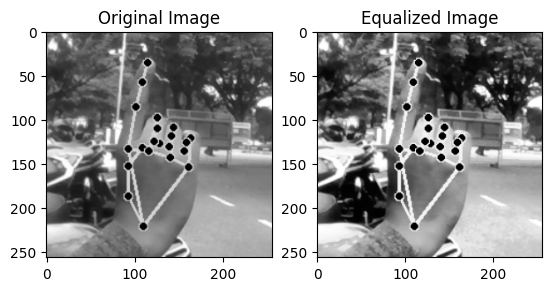

In [4]:
def histogram_equalization(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Perform histogram equalization
    equalized_img = cv2.equalizeHist(img)

    # Display the original and equalized images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.title("Equalized Image")

    plt.show()

histogram_equalization(image_path)

In [5]:
def haralick_texture_analysis(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate Haralick texture features
    features = mh.features.haralick(img)

    # Print the first five Haralick features (you can explore more)
    print("Haralick Texture Features:")
    for i in range(5):
        print(f"Feature {i + 1}: {features[0, i]}")

haralick_texture_analysis(image_path)

NameError: name 'mh' is not defined

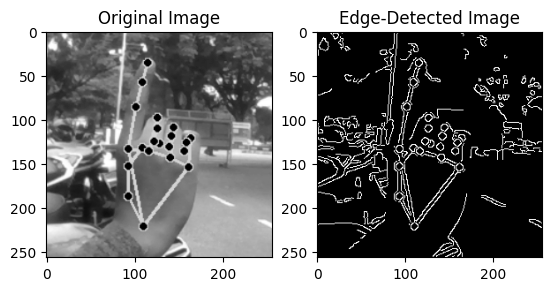

In [6]:
def edge_detection(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Perform Canny edge detection
    edges = cv2.Canny(img, threshold1=100, threshold2=200)

    # Display the original and edge-detected images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge-Detected Image")

    plt.show()

edge_detection(image_path)

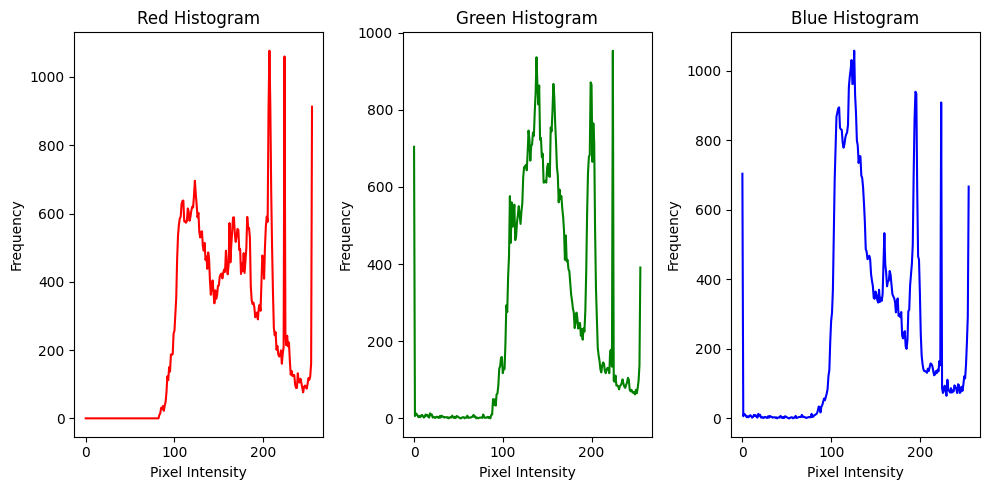

In [9]:
def plot_color_histogram(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape the image to a flat list of pixels
    pixels = img_rgb.reshape(-1, 3)

    # Calculate the histogram for each channel (R, G, B)
    r_hist = np.histogram(pixels[:, 0], bins=256, range=(0, 256))[0]
    g_hist = np.histogram(pixels[:, 1], bins=256, range=(0, 256))[0]
    b_hist = np.histogram(pixels[:, 2], bins=256, range=(0, 256))[0]

    # Create a range of 256 values for the x-axis
    bins = np.arange(256)

    # Plot the histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.plot(bins, r_hist, color='red')
    plt.title('Red Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.plot(bins, g_hist, color='green')
    plt.title('Green Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.plot(bins, b_hist, color='blue')
    plt.title('Blue Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_color_histogram(image_path)